# Deep Learning Classifier

In [1]:

import numpy as np
import os
from skimage import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.


## Reading the image datas from folder

In [2]:
#Variable for the folder path
folderPath = '../Untitled Folder/yalefaces_crop/'
dataPath = []
#print(os.listdir(base_path))
for i in os.listdir(folderPath):
    if i != 'Readme.txt':
        dataPath.append(os.path.join(folderPath, i))
        
        
imData = []
imLabels = []

for file in dataPath:
    #print('reading file',file)
    imRead = io.imread(file, as_grey=True)
    imData.append(imRead)
    #print(os.path.split(file)[1])
    labelRead = int(os.path.split(file)[1].split("B")[1].split("_")[0]) #.replace("subject", "")) - 1 # Parse class label from file
    #print (labelRead)
    imLabels.append(labelRead)
#print (imData)

/home/ilkka/anaconda2/envs/py36tf/lib/python3.6/site-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


## Checking data to be correct
Check the amount of images, number of label and print one image.

Number of images  2432
Number of unique labels  38


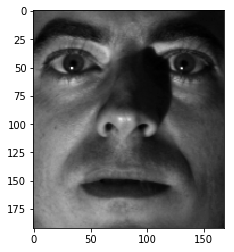

In [3]:
#Number of pictures
amount = len(imData)
#image to be printed
x = imData[np.random.randint(0,amount)]
plt.imshow(x, cmap='gray')
labels = len(np.unique(imLabels))
print ('Number of images ', amount)
print ('Number of unique labels ', labels)
plt.show()

## Reorganising the data

In [4]:
x=np.array(imData)
y = np.array(imLabels)
#amount of data used for training
trnSize = 0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, 
    train_size=trnSize)

/home/ilkka/anaconda2/envs/py36tf/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Modifying data for the training alorithm 


In [5]:
#change the data types to be float32 numbers instead of integers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#make values to be from between 0 and 1
x_train /= 255.
x_test /= 255.

# reshape to: numberOfSamples, channels, height, width
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1], x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1], x_test.shape[2])

#print the shapes to check that all is right
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (1945, 1, 192, 168)
Testing matrix shape (487, 1, 192, 168)


## Building the Neural network

In [6]:
import tensorflow as tf
from keras.models import Model
#from keras.layers import Input, Activation, merge, Dense, Flatten
#from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
#from keras.layers.pooling import AveragePooling2D
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
#from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
#from keras import optimizers 
from keras.callbacks import ModelCheckpoint, History, Callback
#from keras.layers.advanced_activations import PReLU
#from keras import initializers
#from keras.models import load_model
#from keras.optimizers import *

def convMLC():
    sizeX = x_train.shape[2]
    sizeY = x_train.shape[3]
    #choosing the model
    model = Sequential()
    
    ############ADDING LAYERS###########
    
    #First Block
    model.add(Convolution2D(16, (5, 5), activation='relu', name='blk1_conv1', input_shape=(1, sizeX, sizeY),
                            strides=(1, 1), padding="same", kernel_initializer="he_normal"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="blk1_pool", data_format="channels_first"))
    
    #Second Block
    model.add(Convolution2D(26, (5, 5), activation='relu', name='blk2_conv1',
                            strides=(1, 1), padding="same", kernel_initializer="he_normal"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="blk2_pool", data_format="channels_first"))
    model.add(Flatten())

    #Third Block
    model.add(Dense(512, activation="relu", name="fc1", kernel_initializer="he_normal"))
    model.add(Dropout(rate=0.5))

    model.add(Dense(40, activation="softmax", name="prediction", kernel_initializer="he_normal"))
    optim = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    
    return model
model = convMLC()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 1, 192, 16)        67216     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 1, 96, 8)          0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 1, 96, 26)         5226      
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 1, 48, 13)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 624)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               320000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
__________

In [7]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [10]:
def convMLC():
    sizeX = x_train.shape[2]
    sizeY = x_train.shape[3]
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', name='block1_conv1', input_shape=(1, sizeX, sizeY),
                            strides=(1, 1), padding="same", kernel_initializer="he_normal"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block1_pool", data_format="channels_first"))
    model.add(Conv2D(26, (5, 5), activation='relu', name='block2_conv1',
                            strides=(1, 1), padding="same", kernel_initializer="he_normal"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block2_pool", data_format="channels_first"))
    model.add(Flatten())

    model.add(Dense(512, activation="relu", name="fc1", kernel_initializer="he_normal"))
    model.add(Dropout(rate=0.5))

    model.add(Dense(40, activation="softmax", name="prediction", kernel_initializer="he_normal"))
    optim = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    # optim = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    
    return model
model3 = convMLC()
model3.summary()

NameError: name 'Conv2D' is not defined

In [7]:
import keras.backend as ks
loss_history = History()
#print (x_train.shape)
ks.set_value(model.optimizer.lr,0.0005)
model.fit(x_train, y_train, batch_size=64, epochs=100, 
          verbose=1, validation_data=(x_test, y_test), 
          callbacks=[loss_history])


Train on 1945 samples, validate on 487 samples
Epoch 1/100
1945/1945 [==============================] - 4s 2ms/step - loss: 3.6722 - acc: 0.0288 - val_loss: 3.5965 - val_acc: 0.0164
Epoch 2/100
1945/1945 [==============================] - 1s 762us/step - loss: 3.5352 - acc: 0.0720 - val_loss: 3.3424 - val_acc: 0.1478
Epoch 3/100
1945/1945 [==============================] - 1s 762us/step - loss: 3.1563 - acc: 0.1656 - val_loss: 2.7192 - val_acc: 0.3018
Epoch 4/100
1945/1945 [==============================] - 1s 768us/step - loss: 2.4769 - acc: 0.3054 - val_loss: 2.0070 - val_acc: 0.5195
Epoch 5/100
1945/1945 [==============================] - 2s 820us/step - loss: 1.8632 - acc: 0.4787 - val_loss: 1.4000 - val_acc: 0.6858
Epoch 6/100
1945/1945 [==============================] - 2s 793us/step - loss: 1.4406 - acc: 0.5851 - val_loss: 1.1201 - val_acc: 0.7577
Epoch 7/100
1945/1945 [==============================] - 2s 782us/step - loss: 1.1923 - acc: 0.6617 - val_loss: 0.9141 - val_acc: 0.8

In [135]:

model2.fit(x_train, y_train, batch_size=64, nb_epoch=10, 
          verbose=1, validation_data=(x_test, y_test), 
          callbacks=[loss_history])

/home/ilkka/anaconda2/envs/py36/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1945 samples, validate on 487 samples
Epoch 1/10
1945/1945 [==============================] - 14s 7ms/step - loss: 3.7013 - acc: 0.0262 - val_loss: 3.6742 - val_acc: 0.0205
Epoch 2/10
1945/1945 [==============================] - 13s 7ms/step - loss: 3.6572 - acc: 0.0308 - val_loss: 3.6654 - val_acc: 0.0246
Epoch 3/10
1945/1945 [==============================] - 13s 7ms/step - loss: 3.6480 - acc: 0.0262 - val_loss: 3.6410 - val_acc: 0.0103
Epoch 4/10
1945/1945 [==============================] - 14s 7ms/step - loss: 3.6035 - acc: 0.0386 - val_loss: 3.5767 - val_acc: 0.0185
Epoch 5/10
1945/1945 [==============================] - 14s 7ms/step - loss: 3.4842 - acc: 0.0586 - val_loss: 3.4600 - val_acc: 0.0390
Epoch 6/10
1945/1945 [==============================] - 17s 9ms/step - loss: 3.3043 - acc: 0.0915 - val_loss: 3.1381 - val_acc: 0.1068
Epoch 7/10
1945/1945 [==============================] - 16s 8ms/step - loss: 3.0427 - acc: 0.1445 - val_loss: 2.8298 - val_acc: 0.1930
Epoch 8/

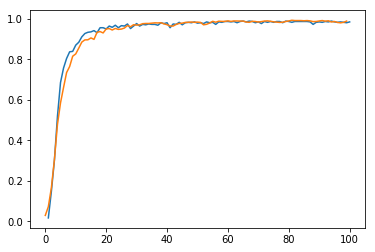

In [8]:
import pandas as pd
#import ggplot

# Plot model history
df = pd.DataFrame(loss_history.history)
df.loc[:,'Iter'] = np.arange(1, len(loss_history.history['acc'])+1, 1)
plt.plot(df.Iter,df.val_acc,df.acc)
plt.show()
#print (df)

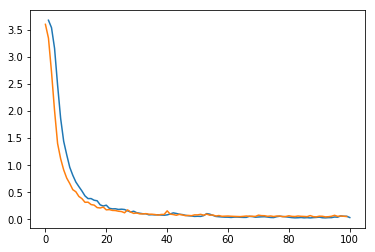

In [9]:
plt.plot(df.Iter, df.loss, df.val_loss)
plt.show()

In [10]:
#from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test)


In [14]:
yp = []
for i in y_pred:
    yp.append(np.argmax(i))
print (y_test)
print (yp)
print('Confusion Matrix')
print(confusion_matrix(y_test, yp))

[36 17 16 30 10 32 33 11  5 19 39 30  7  7 25  6 24 19 33 26 33  4  4  9
  2 13 18  5 27  1 37  9 11 12 32 17 24 21 36 31 27 23  1 25 26  1 29 13
 35 38 28 17  9  4  8 23  1  2 29  5  3 19 24 32 24 17  8  2  2 20 37 32
  3  4  2  8 11 20  6 37  8 39 11  3 33 27 22 25 37 17  6 26 26 36 17 11
  6 12 25  2 19  5  2 35  9 34 18  7 33 19  2 12 13 21 28  8  6 20 31 15
 17 30 31  8 28 23  7 26 35  7 15  7 19 19 10 20 12 17 34 12 20 10 15 26
  8 10 16 22 12  2 17 27 37 10  6 19 23  1 36 31 16  6 16 16 32 17  7 36
 35  3 26 26 29  2 36 10  4 26 35  2 32 36 31 25  7 31 35  4 12  7 29 33
 26 12 11 27 16 32 39  3 30 22 26  2 16 34  9 35  6 10 39 39 25 19 23 29
 18 12 30 12 15  8 17 33 20 28 39  5 30 17 32 26 28 32 32 11 38 39  9 21
  5  8 17 29 15 36 27 24 23 23  6  1 12 31 12 25 20 31 29 24  3 22 28 17
 16 10 29 34  2  7 19 38 29 39 25 34 35 31 23 21  6 24 20  8 35 31 28 38
  2 34 20  2 31 17 30 10 27 27 26 15 34 10 10 22 39 19  4  5 11  3  7 29
 31 37 17 32  5 33 30 38 12 25  6 20 39  9 10 26  9

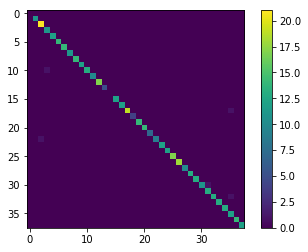

In [15]:
plt.imshow(confusion_matrix(y_test, yp, labels=range(labels)));
plt.colorbar()
plt.show()

In [163]:
model3.fit(x_train, y_train, batch_size=64, epochs=10, 
          verbose=1, validation_data=(x_test, y_test), 
          callbacks=[loss_history])

Train on 1945 samples, validate on 487 samples
Epoch 1/10
1945/1945 [==============================] - 7s 4ms/step - loss: 3.6632 - acc: 0.0278 - val_loss: 3.6191 - val_acc: 0.0144
Epoch 2/10
1945/1945 [==============================] - 7s 4ms/step - loss: 3.5009 - acc: 0.0622 - val_loss: 3.2668 - val_acc: 0.1478
Epoch 3/10
1945/1945 [==============================] - 6s 3ms/step - loss: 2.8198 - acc: 0.2432 - val_loss: 2.1580 - val_acc: 0.4374
Epoch 4/10
1945/1945 [==============================] - 7s 4ms/step - loss: 1.8720 - acc: 0.4833 - val_loss: 1.3896 - val_acc: 0.6756
Epoch 5/10
1945/1945 [==============================] - 7s 3ms/step - loss: 1.2225 - acc: 0.6447 - val_loss: 0.9479 - val_acc: 0.7782
Epoch 6/10
1945/1945 [==============================] - 6s 3ms/step - loss: 0.8490 - acc: 0.7589 - val_loss: 0.6850 - val_acc: 0.8337
Epoch 7/10
1945/1945 [==============================] - 7s 3ms/step - loss: 0.6038 - acc: 0.8406 - val_loss: 0.4988 - val_acc: 0.8665
Epoch 8/10
1945

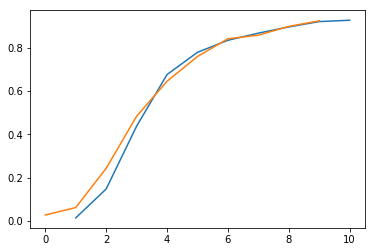

In [164]:
import pandas as pd
#import ggplot

# Plot model history
df = pd.DataFrame(loss_history.history)
df.loc[:,'Iter'] = np.arange(1, len(loss_history.history['acc'])+1, 1)
plt.plot(df.Iter,df.val_acc,df.acc)
plt.show()
#print (df)

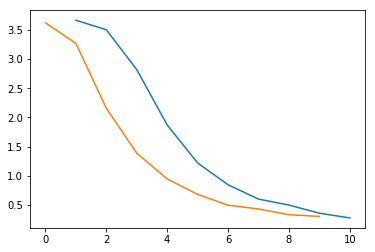

In [165]:
plt.plot(df.Iter, df.loss, df.val_loss)
plt.show()

In [166]:
y_pred = model3.predict(x_test)
yp = []
for i in y_pred:
    yp.append(np.argmax(i))
print (y_test)
print (yp)
print('Confusion Matrix')
print(confusion_matrix(y_test, yp))

[22  2 11 11 31 24 37 31 11 26 22 11  7 30 23 26  3  3 37  8 29 37 16 24
 29 35 15  5 11  5 19 22  7 27 12  7 21  7  2 12  9 19 18 35 18 28 37 34
 39 22 15 27  8  7  6 23 28 26 16 27  4 37 30  5 21 38 33 21  5  5  3 13
 17 29 28  1 20 28 26  4  6  5 11  5 24 25 22 32 37 19 19 11 12 38 10 26
  4 39 12 17 16 18 26 11 21 22 33 25 27 12  5 26 16 12 39 17  7 11 33 10
 34 17  5  9 39 19 11 20 23 38 33 11 13  8  9 30 39 30 13 19 26 33 34 10
  3 13 35 39 25 32  7  3 32 35  6  9 36  8  4  4 36  8  2  7 28 36  3 12
  9 17 13 24 26 23  8  2 17 29 16  3 28  4 30 37 12 25 21 19  1  5  7  3
 26 31 18 16 34 39 23 16  9  8 36 24 23 31 36 22 28 36 29  9  4  5 22  3
 19  4 20 29 12 36  7 35  2 34  9 27 34  1  7 30 37 36  8 36 18 33 26 33
 16 19  9 12 19 27 34 18 23 19 24 38  1 15 21 30 21 24 18  1 30 26 25 37
 23 10 34 38 21  9 16 10 18 19  8  2 10 32 24  6  2 37 37 22  5 37 36 23
 39 22 37 15 24 15  4  4 21 39 23 27  7 36 10 33  9  6 29 21 33  6 33 24
 19 38 21  8 38 38 36 23 39 22 34 20  1  7  2 36 29

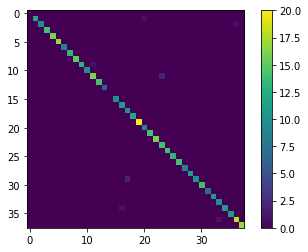

In [181]:
plt.imshow(confusion_matrix(y_test, yp, labels=range(labels)));
plt.colorbar()
plt.show()